In [454]:
# --------------------------------------------
# Blame : Raghul Ranganathan J
# Assignment : Regression using Regularisation
# Description : to build a regression model using regularisation in order to predict the actual value of the prospective properties
# Language : Python3
# Version: 0.1
# Start Date : 16th Mar 2021
# End Date : 22nd Mar 2021
# ----------------------------------------------

### Problem Statement

    A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia
    The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


### Project Motive

1. Which variables are significant in predicting the price of a house,
2. How well those variables describe the price of a house.

### Business Goal
To model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


##### Dataset Characteristics

These are the list of characterstics used in the data

| Column        | Description           |
| :-------------- | :------------- |
| MSSubClass    | Identifies the type of dwelling involved in the sale. | 
| MSZoning      | Identifies the general zoning classification of the sale.      |
| LotFrontage | Linear feet of street connected to property      |
| LotArea | Lot size in square feet      |
| Street | Type of road access to property      |
| Alley      |  Type of alley access to property      |
| LotShape |  General shape of property      |
| LandContour | Flatness of the property      |
| Utilities |  Type of utilities available     |
| LotConfig      |  Lot configuration      |
| LandSlope |Slope of property      |
| Neighborhood | Physical locations within Ames city limits     |
| Condition1 | Proximity to various conditions      |
| Condition2 | Proximity to various conditions (if more than one is present)      |
| BldgType| Type of dwelling      |
| HouseStyle | Style of dwelling      |
| OverallQual | Rates the overall material and finish of the house      |
| OverallCond | Rates the overall condition of the house      |
|YearBuilt |Original construction date |
|YearRemodAdd | Remodel date (same as construction date if no remodeling or additions) |
|RoofStyle | Type of roof      |
| RoofMatl |  Roof material      |
| Exterior1st | Exterior covering on house      |
| Exterior2nd | Exterior covering on house (if more than one material)      |
| MasVnrType | Masonry veneer type |
| MasVnrArea | Masonry veneer area in square feet|
|ExterQual | Evaluates the quality of the material on the exterior |
|Foundation | Type of foundation|
|BsmtQual | Evaluates the height of the basement |
|BsmtCond | Evaluates the general condition of the basement |
|BsmtExposure | Refers to walkout or garden level walls |
|BsmtFinType1 | Rating of basement finished area|
|BsmtFinSF1 | Type 1 finished square feet|
|BsmtFinType2 | Rating of basement finished area (if multiple types)|
BsmtFinSF2 |Type 2 finished square feet|
|BsmtUnfSF | Unfinished square feet of basement area|
|TotalBsmtSF | Total square feet of basement area|
|Heating | Type of heating|
|HeatingQC | Heating quality and condition|
|CentralAir | Central air conditioning
|Electrical | Electrical system|
|1stFlrSF |  First Floor square feet|
 |2ndFlrSF | Second floor square feet|
|LowQualFinSF: | Low quality finished square feet (all floors)|
|GrLivArea |  Above grade (ground) living area square feet|
|BsmtFullBath |  Basement full bathrooms|
|BsmtHalfBath |  Basement half bathrooms|
|FullBath |  Full bathrooms above grade
|HalfBath |  Half baths above grade|
|Bedroom |  Bedrooms above grade (does NOT include basement bedrooms)|
|Kitchen |  Kitchens above grade|
|KitchenQual |  Kitchen quality|
TotRmsAbvGrd | Total rooms above grade (does not include bathrooms)|
|Functional | Home functionality (Assume typical unless deductions are warranted)|
|Fireplaces | Number of fireplaces|
|FireplaceQu | Fireplace quality|
|GarageType | Garage location|
|GarageYrBlt | Year garage was built|
|GarageFinish | Interior finish of the garage|
|GarageCars | Size of garage in car capacity|
|GarageArea | Size of garage in square feet|
|GarageQual | Garage quality|
|GarageCond | Garage condition|
|PavedDrive | Paved driveway|
|WoodDeckSF | Wood deck area in square feet|
|OpenPorchSF | Open porch area in square feet|
|EnclosedPorch | Enclosed porch area in square feet|
|3SsnPorch | Three season porch area in square feet|
|ScreenPorch | Screen porch area in square feet|
|PoolArea | Pool area in square feet|
|PoolQC | Pool quality|
|Fence | Fence quality|
|MiscFeature | Miscellaneous feature not covered in other categories|
|MiscVal | $Value of miscellaneous feature|
|MoSold | Month Sold (MM)|
|YrSold | Year Sold (YYYY)|
|SaleType | Type of sale|
|SaleCondition | Condition of sale|

## Steps to proceed with the creating a model for the Suprise Home Analysis
- **Proceed with EDA to know about data**
    - Data understanding
    - Data cleaning (cleaning missing values, removing redundant columns etc.)
    - Data Analysis
- **Visualize the data for better understanding**
- **Data Preparation**
- **Splitting the Data into Training and Testing Sets**
- **Building a model**
- **Evaluation**

### STEP: 1 EDA for Reading and Understanding the Data

Let us first import NumPy and Pandas libraries and read the biking dataset

In [455]:
# Importing libraries necessary for the study
import numpy as np
import pandas as pd

# Plot Libs
import matplotlib.pyplot as plt
import seaborn as sns

# Sk Learn Lib
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Avoid and Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Adding Max Rows to 300
pd.options.display.max_rows = 300

In [456]:
# Read and import the data using Pandas

House_df = pd.read_csv('./train.csv')

In [457]:
# List Top Data

House_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's analyise the data using inbuilt functions

In [458]:
# Shape

House_df.shape

(1460, 81)

In [459]:
# Info

House_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [460]:
# Describe

House_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [461]:
# Check for duplicates

sum(House_df.duplicated())

0

Let's list down the null values in the columns so that we can eliminate them easily

In [462]:
House_df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [463]:
# Getting missing values in percentage

round(100*(House_df.isnull().sum()/len(House_df.index)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

We could clearly see that `PoolQC`, `MiscFeature`, `Alley`,  `Fence`, `FireplaceQu` has more missing values and we have analyze then further specifically to remove them from the data.
Having more missing values have no point in analyzing the row

In [464]:
# Find the unique values in the above columns

# 1.PoolQc
House_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [465]:
# Find the unique values in the above columns

# 1.MiscFeature
House_df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [466]:
# Find the unique values in the above columns

# 2.Alley
House_df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [467]:
# Find the unique values in the above columns

# 3.Fence
House_df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [468]:
# Find the unique values in the above columns

# 4.FireplaceQu
House_df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

From the above output we can clearly see the below percentage and also with unique values we can observe that the count is minimal for top 4 values and hence we can conclude to drop those columns

<table>
  <tbody>
    <tr>
      <th>Column</th>
      <th align="center">Missing %</th>
    </tr>
    <tr>
      <td>PoolQCs</td>
      <td align="center"> 99.52%</td>
    </tr>
    <tr>
      <td>MiscFeatures</td>
      <td align="center"> 96.30%</td>
    </tr>
    <tr>
      <td>Alley</td>
      <td align="center">93.77%</td>
    </tr>
     <tr>
      <td>Fence</td>
      <td align="center">80.75%</td>
    </tr>
       <tr>
      <td>FireplaceQu</td>
      <td align="center">47.26%</td>
    </tr>
  </tbody>
</table>

In [469]:
# Drop Columns

# Columns to drop - 'PoolQC', 'MiscFeature', 'Alley', 'Fence'

House_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis =1, inplace = True)

In [470]:
# Again let's check for the missing values percentage

round(100*(House_df.isnull().sum()/len(House_df.index)), 2).sort_values(ascending=False)

FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
GarageCond        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofMatl          0.00
RoofStyle         0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
Heating           0.00
BsmtFinSF2 

As Per the reference in the data dictionary if there is no fire place we need to mention it in NA or N/A but we can't see those values as mentioned here

```
Gd    380
TA    313
Fa     33
Ex     24
Po     20
```

And thus the missing ~47% values has to be replaced with the NA

In [471]:
# Replace null with NA values to avoid the droping of columns

House_df['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)

House_df['FireplaceQu'].replace({'Fa':'With Fireplace'},inplace=True)
House_df['FireplaceQu'].replace({'TA':'With Fireplace'},inplace=True)
House_df['FireplaceQu'].replace({'Gd':'With Fireplace'},inplace=True)
House_df['FireplaceQu'].replace({'Ex':'With Fireplace'},inplace=True)
House_df['FireplaceQu'].replace({'Po':'With Fireplace'},inplace=True)

In [472]:
# Find the unique values in the FireplaceQu column

House_df['FireplaceQu'].value_counts()

With Fireplace    770
No Fireplace      690
Name: FireplaceQu, dtype: int64

Thus the missing data is being fixed with the NA and there is no more missing data in FireplaceQu column

In [473]:
# Let's check with next column which has more null data LotFrontage = ~17%

# describe the column values

House_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

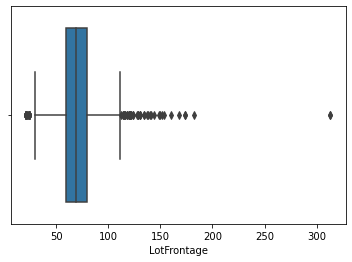

In [474]:
sns.boxplot('LotFrontage', data = House_df)

We can clearly see there is a outlier in the data as the few data crosses 300+ and now we have decide either to remove or retain the column by filling the data with median value
considering there is no much of missing values like greater than 40% or more we can impute them with the median value

In [475]:

House_df['LotFrontage'].fillna(House_df['LotFrontage'].median(), inplace=True)

In [476]:
# List of values in LotFrontage

House_df['LotFrontage'].value_counts()

69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
68.0      19
24.0      19
64.0      19
73.0      18
63.0      17
55.0      17
79.0      17
72.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
40.0      12
71.0      12
43.0      12
67.0      12
82.0      12
57.0      12
76.0      11
34.0      10
53.0      10
88.0      10
86.0      10
92.0      10
44.0       9
62.0       9
84.0       9
77.0       9
35.0       9
96.0       8
98.0       8
61.0       8
93.0       8
120.0      7
107.0      7
95.0       7
58.0       7
41.0       6
30.0       6
105.0      6
94.0       6
54.0       6
91.0       6
89.0       6
81.0       6
48.0       6
36.0       6
110.0      6
87.0       5
37.0       5
56.0       5
32.0       5
47.0       5
83.0       5
102.0      4
49.0       4
42.0       4
130.0      3
108.0      3
103.0      3
104.0      3
45.0       3
99.0       3
109.0      2

In [477]:
# GarageType data check

House_df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [478]:
# Cleaning up data in GarageType (Rename NA => No Garage)

House_df['GarageType'].fillna('No Garage', inplace=True)

# Grouping the values which are less compared
House_df['GarageType'].replace({'CarPort':'Others'},inplace=True)
House_df['GarageType'].replace({'Basment':'Others'},inplace=True)
House_df['GarageType'].replace({'No Garage':'Others'},inplace=True)
House_df['GarageType'].replace({'2Types':'Others'},inplace=True)

In [479]:
#  Check GarageType Values now

House_df['GarageType'].value_counts()

Attchd     870
Detchd     387
Others     115
BuiltIn     88
Name: GarageType, dtype: int64

In [480]:
# GarageFinish data check

House_df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [481]:
#  Cleaning up data in GarageFinish data

House_df['GarageFinish'].fillna('No Garage', inplace=True)

In [482]:
# Cleaning up data in GarageYrBlt (Replace null => 0)

House_df['GarageYrBlt'].fillna(0, inplace=True)

In [483]:
# Cleaning up data in GarageQual (Replace null => 0)

# Imputing values to the GarageQual vars
House_df['GarageQual'].replace({'TA':'OK Garage'},inplace=True)
House_df['GarageQual'].replace({'Fa':'OK Garage'},inplace=True)
House_df['GarageQual'].replace({'Gd':'OK Garage'},inplace=True)
House_df['GarageQual'].replace({'Ex':'OK Garage'},inplace=True)

# Minimal and No values to No Garage
House_df['GarageQual'].replace({'Po':'No Garage'},inplace=True)
House_df['GarageQual'].fillna('No Garage', inplace=True)
# List Values
House_df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [484]:
# Cleaning up data in GarageCond (Replace null => 0)

House_df['GarageCond'].fillna('No Garage', inplace=True)
House_df['GarageCond'].replace({'Po':'No Garage'},inplace=True)

# Imputing values to the GarageCond vars
House_df['GarageCond'].replace({'TA':'OK Garage'},inplace=True)
House_df['GarageCond'].replace({'Fa':'OK Garage'},inplace=True)
House_df['GarageCond'].replace({'Gd':'OK Garage'},inplace=True)
House_df['GarageCond'].replace({'Ex':'OK Garage'},inplace=True)

In [485]:
# Cleaning up data in BsmtQual (Rename NA => No Basement)

House_df['BsmtQual'].replace({np.nan:'No Basement'},inplace=True)

# List Values
House_df['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [486]:
# The low data values can be grouped under Other

House_df['BsmtQual'].replace({'Fa':' Others'},inplace=True)
House_df['BsmtQual'].replace({'Ex':' Others'},inplace=True)
House_df['BsmtQual'].replace({'No Basement':' Others'},inplace=True)

House_df['BsmtQual'].value_counts()

TA         649
Gd         618
 Others    193
Name: BsmtQual, dtype: int64

In [487]:
# Cleaning up data in BsmtCond (Rename NA => No Basement)

House_df['BsmtCond'].replace({np.nan:'No Basement'},inplace=True)

# List Values
House_df['BsmtCond'].value_counts()

# We can see 3 group of fair data and treated as Good
House_df['BsmtCond'].replace({'Fa':'Good'},inplace=True)
House_df['BsmtCond'].replace({'Ta':'Good'},inplace=True)
House_df['BsmtCond'].replace({'Gd':'Good'},inplace=True)

# We can see 3 group of ppoor data and treated as Bad
House_df['BsmtCond'].replace({'Po':'Bad'},inplace=True)
House_df['BsmtCond'].replace({'No Basement':'Bad'},inplace=True)

In [488]:
# Cleaning up data in BsmtExposure (Rename NA => No Basement)

House_df['BsmtExposure'].replace({np.nan:'No Basement'},inplace=True)

# List Values
House_df['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [489]:
# Cleaning up data in BsmtFinType1 (Rename NA => No Basement)

House_df['BsmtFinType1'].replace({np.nan:'No Basement'},inplace=True)

In [490]:
# Cleaning up data in BsmtFinType2 (Rename NA => No Basement)

House_df['BsmtFinType2'].replace({np.nan:'No Basement'},inplace=True)

In [491]:
# Let's compare the Basement data vars

House_df_basement=House_df[['BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
House_df_basement.head()
House_df_basement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1460 non-null   object
 1   BsmtExposure  1460 non-null   object
 2   BsmtFinType1  1460 non-null   object
 3   BsmtFinType2  1460 non-null   object
 4   BsmtFinSF1    1460 non-null   int64 
 5   BsmtFinSF2    1460 non-null   int64 
 6   BsmtUnfSF     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 91.4+ KB


<Figure size 1440x720 with 0 Axes>

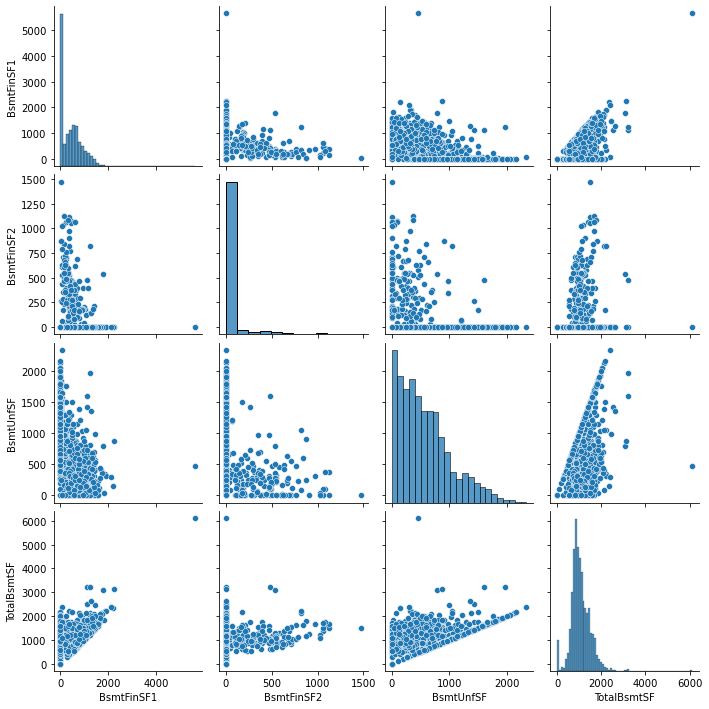

In [492]:
# Pairplot for basement

plt.figure(figsize=(20, 10))
sns.pairplot(House_df_basement)
plt.show()

We can see correleation among BsmtFinSF1, BsmtFinSF2, BsmtUnfSF and hence they are related
We can ignore them

In [493]:
House_df=House_df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

In [494]:
#Imputing values of the minor levels in Neighborhood to Others

House_df['Neighborhood'].replace({np.nan:'None'}, inplace=True)

House_df['Neighborhood'].replace({'ClearCr':'Others'},inplace=True)
House_df['Neighborhood'].replace({'SWISU':'Others'},inplace=True)
House_df['Neighborhood'].replace({'StoneBr':'Others'},inplace=True)
House_df['Neighborhood'].replace({'Blmngtn':'Others'},inplace=True)
House_df['Neighborhood'].replace({'MeadowV':'Others'},inplace=True)
House_df['Neighborhood'].replace({'BrDale':'Others'},inplace=True)
House_df['Neighborhood'].replace({'Veenker':'Others'},inplace=True)
House_df['Neighborhood'].replace({'NPkVill':'Others'},inplace=True)
House_df['Neighborhood'].replace({'Blueste':'Others'},inplace=True)

House_df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
Others     150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
Name: Neighborhood, dtype: int64

In [495]:
# Cleaning up data in MasVnrArea with the media or mode

House_df['MasVnrArea'] = House_df['MasVnrArea'].fillna(House_df['MasVnrArea'].median())

In [496]:
# Checking MasVnrType field

House_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [497]:
# Cleaning up data in MasVnrType null values

House_df['MasVnrType'].replace({np.nan:'None'}, inplace=True)

In [498]:
# Checking Electrical field

House_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [499]:
# Cleaning up data in Electrical with the media or mode

House_df['Electrical'] = House_df['Electrical'].fillna(House_df['Electrical'].mode())

In [500]:
# Reduce Values by combining

House_df['Electrical'].replace(to_replace=['FuseF','FuseP','Mix'], value='Fuse-FP-Mix', inplace=True)

House_df= House_df[~pd.isnull(House_df['Electrical'])]

In [501]:
# Again let's check for the missing values percentage

round(100*(House_df.isnull().sum()/len(House_df.index)), 2).sort_values(ascending=False)

SalePrice        0.0
YearBuilt        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
TotalBsmtSF      0.0
YearRemodAdd     0.0
OverallCond      0.0
SaleCondition    0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch

In [502]:
# Check the missing values in rows

House_df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Length: 1459, dtype: int64

In [503]:
# Describe the values

House_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,69.861549,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,1057.891021,1162.906785,346.791638,5.848526,1515.546950,0.425634,0.057574,1.564770,0.382454,2.866347,1.046607,6.517478,0.613434,1868.644962,1.766964,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,421.411181,42.310746,22.035077,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,438.500975,386.572089,436.610637,48.639512,525.650927,0.518969,0.238830,0.550987,0.502798,0.816050,0.220410,1.625902,0.644687,453.838403,0.747546,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,796.000000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [504]:
# Shape of the data frame

House_df.shape

(1459, 74)

In [505]:
#Find unique in the record

House_df.nunique().sort_values(ascending =True)

Utilities           2
GarageCond          2
GarageQual          2
Street              2
FireplaceQu         2
CentralAir          2
BsmtQual            3
HalfBath            3
Electrical          3
LandSlope           3
BsmtCond            3
BsmtHalfBath        3
PavedDrive          3
MasVnrType          4
KitchenAbvGr        4
FullBath            4
KitchenQual         4
GarageType          4
BsmtFullBath        4
GarageFinish        4
LandContour         4
LotShape            4
Fireplaces          4
ExterQual           4
BsmtExposure        5
ExterCond           5
YrSold              5
HeatingQC           5
BldgType            5
GarageCars          5
LotConfig           5
MSZoning            5
Foundation          6
Heating             6
RoofStyle           6
SaleCondition       6
Functional          7
BsmtFinType2        7
BsmtFinType1        7
Condition2          8
HouseStyle          8
BedroomAbvGr        8
RoofMatl            8
PoolArea            8
SaleType            9
Condition1

We have completed the 
- Data Cleaning
- Null Value treatment
- Grouping minor labels

We need to split the data into 
- Categorical
- Non-Categorical Values (Numerical)

In [506]:
# stroing numeric variables in numeric_df

numeric_df = House_df.select_dtypes(include = ['int64', 'float64'])

In [507]:
numeric_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [508]:
numeric_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,69.861549,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,1057.891021,1162.906785,346.791638,5.848526,1515.546950,0.425634,0.057574,1.564770,0.382454,2.866347,1.046607,6.517478,0.613434,1868.644962,1.766964,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,421.411181,42.310746,22.035077,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,438.500975,386.572089,436.610637,48.639512,525.650927,0.518969,0.238830,0.550987,0.502798,0.816050,0.220410,1.625902,0.644687,453.838403,0.747546,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,796.000000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [509]:
# storing categorical variables in categorical_df

categorical_df = House_df.select_dtypes(include = ['object'])

In [510]:
categorical_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,OK Garage,OK Garage,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Others,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,With Fireplace,Attchd,RFn,OK Garage,OK Garage,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,With Fireplace,Attchd,RFn,OK Garage,OK Garage,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Good,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,With Fireplace,Detchd,Unf,OK Garage,OK Garage,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,With Fireplace,Attchd,RFn,OK Garage,OK Garage,Y,WD,Normal


In [511]:
categorical_df.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
unique,5,2,4,4,2,5,3,17,9,8,5,8,6,8,15,16,4,4,5,6,3,3,5,7,7,6,5,2,3,4,7,2,4,4,2,2,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,With Fireplace,Attchd,Unf,OK Garage,OK Garage,Y,WD,Normal
freq,1150,1453,924,1310,1458,1051,1381,225,1259,1444,1219,726,1140,1433,514,503,871,905,1281,646,649,1310,952,429,1255,1427,741,1364,1334,735,1359,770,870,605,1375,1371,1339,1266,1197


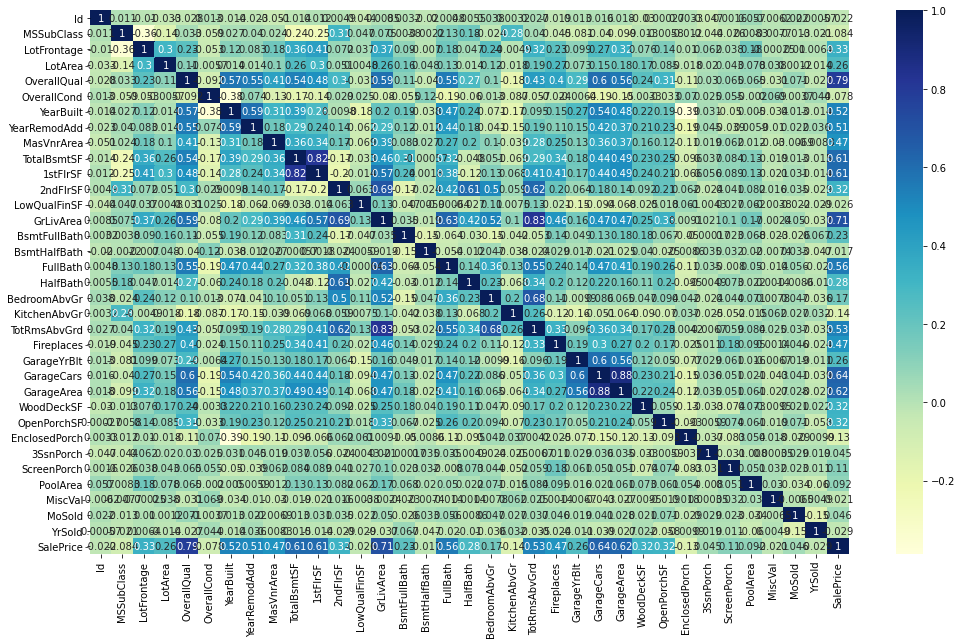

In [512]:
# correlation matrix

corr = numeric_df.corr()

# plotting correlations in a heatmap

# figure size
plt.figure(figsize=(17,10))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [513]:
final_df = House_df

# Bckup data of House

In [514]:
House_df.shape

(1459, 74)

In [515]:
# CentralAir changing to dummies

House_df['CentralAir']=House_df['CentralAir'].map({'Y':1,'N':0})

In [516]:
# PavedDrive changing to dummies

House_df['PavedDrive']=House_df['PavedDrive'].map({'Y':1,'N':0})

In [517]:
# Street changing to dummies

House_df['Street']=House_df['Street'].map({'Pave':1,'Grv1':0})

In [518]:
# Utilities changing to dummies

House_df['Utilities']=House_df['Utilities'].map({'AllPub':1,'NoSeWa':0})

In [519]:
# Converting into dummies
categorical_dummies = pd.get_dummies(categorical_df, drop_first=True)
categorical_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Good,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_With Fireplace,GarageType_BuiltIn,GarageType_Detchd,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_OK Garage,GarageCond_OK Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [520]:
# drop all categorical variables 

final_df = final_df.drop(list(categorical_df.columns), axis=1)

In [521]:
# Merge Dummies and Numerical

final_df = pd.concat([final_df, categorical_dummies], axis=1)

In [522]:
# Final Shape of df

final_df.shape

(1459, 216)

In [526]:
# Treating it as y

y = final_df['SalePrice']

In [527]:
# Scaling the features using our sklearn

from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the dataframe is converted to a numpy array)
cols = final_df.columns
final_df = pd.DataFrame(scale(final_df))
final_df.columns = cols
final_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=216)

In [528]:
# Let's split the data into train and test
from sklearn.model_selection import train_test_split

X = final_df.drop(['SalePrice'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [529]:

X_train.shape

(1021, 215)

### Model Building and Evaluation

##### Building Multiple Linear Regression Model 

In [ ]:
# Importing required Libraries
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [531]:
# prepare for linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict the Value of R-Squared in Training Set
print("R-Squared for Training Set")
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

R-Squared for Training Set


0.9330832188866841

In [532]:
# predict the Value of R-Squared in Test Set
print("R-Squared for Training Set")
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

R-Squared for Training Set


-1.058658041982337e+22

In [534]:
model_params = list(lm.coef_)
model_params.insert(0, lm.intercept_)
model_params = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_params))

[('constant', -196317128469387.78),
 ('Id', 1191.007),
 ('MSSubClass', -2129.407),
 ('LotFrontage', 1675.359),
 ('LotArea', 5541.965),
 ('OverallQual', 9589.925),
 ('OverallCond', 7002.809),
 ('YearBuilt', 9286.288),
 ('YearRemodAdd', 1812.559),
 ('MasVnrArea', 5114.989),
 ('TotalBsmtSF', 11787.207),
 ('1stFlrSF', 2.000730358593456e+16),
 ('2ndFlrSF', 2.259708292062317e+16),
 ('LowQualFinSF', 2517371306910843.5),
 ('GrLivArea', -2.7205424186637624e+16),
 ('BsmtFullBath', 4625.547),
 ('BsmtHalfBath', 390.809),
 ('FullBath', 1787.771),
 ('HalfBath', -584.088),
 ('BedroomAbvGr', -4392.183),
 ('KitchenAbvGr', -3892.877),
 ('TotRmsAbvGrd', 1417.705),
 ('Fireplaces', 3025.357),
 ('GarageYrBlt', 11630.475),
 ('GarageCars', 3853.755),
 ('GarageArea', 3580.657),
 ('WoodDeckSF', 1058.74),
 ('OpenPorchSF', -230.369),
 ('EnclosedPorch', -620.345),
 ('3SsnPorch', 732.19),
 ('ScreenPorch', 1077.101),
 ('PoolArea', 8583.068),
 ('MiscVal', 167.433),
 ('MoSold', -1086.908),
 ('YrSold', -730.08),
 ('MSZ

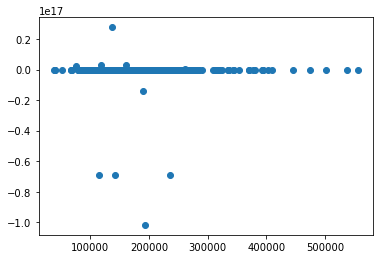

In [558]:
predictions = lm.predict(X_test)  

plt.scatter(y_test,predictions)

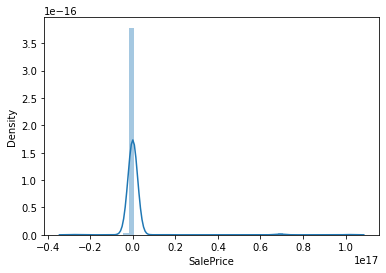

In [559]:
sns.distplot((y_test-predictions),bins=50); 

### Lasso Regression

In [535]:

# Trying grid search CV

# set up cross validation scheme
folds = 5

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000,1500 ]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:   34.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500]},
             return_train_score=True, scoring='r2', verbose=1)

In [536]:
# checking Grid CV results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.241871,0.073423,0.005757,0.002919,0.0001,{'alpha': 0.0001},0.882781,0.160093,0.348088,0.395157,0.864705,0.530165,0.291406,29,0.930078,0.953307,0.946826,0.934859,0.937242,0.940462,0.008427
1,0.195006,0.028850,0.004622,0.000804,0.001,{'alpha': 0.001},0.882781,0.160097,0.348090,0.395171,0.864704,0.530169,0.291403,28,0.930078,0.953307,0.946826,0.934859,0.937242,0.940462,0.008427
2,0.177978,0.014051,0.004936,0.001202,0.01,{'alpha': 0.01},0.882781,0.160138,0.348108,0.395318,0.864688,0.530207,0.291373,27,0.930078,0.953307,0.946826,0.934859,0.937242,0.940462,0.008427
3,0.189558,0.010594,0.004892,0.000867,0.05,{'alpha': 0.05},0.882779,0.160321,0.348184,0.395971,0.864615,0.530374,0.291240,26,0.930078,0.953306,0.946826,0.934859,0.937242,0.940462,0.008427
4,0.267195,0.086445,0.004975,0.000584,0.1,{'alpha': 0.1},0.882778,0.160549,0.348248,0.396785,0.864520,0.530576,0.291077,25,0.930078,0.953306,0.946826,0.934859,0.937242,0.940462,0.008427


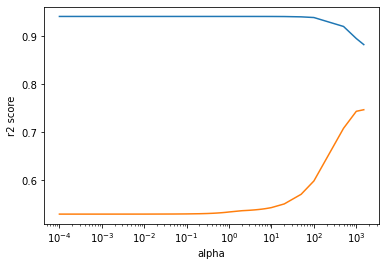

In [537]:
# Plotting 

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('Aplha')
plt.ylabel('R-Squared score')

plt.xscale('log')
plt.show()

In [541]:
# lasso regression
lasso = Lasso(alpha=1000)
lasso.fit(X_train, y_train)

# train prediction
print('R-square on Training Dataset')
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

# test prediction

print( '\n R-square on Test dataset')
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

R-square on Training Dataset
0.883449250945863

 R-square on Test dataset
0.8685855221615439


As a Result of Lasso Regression we got

##### R-squared for Train Data - 88.344

##### R-squared for Test Data - 86.858


This result says its a kind of good model

In [543]:
# lasso model params

model_params = list(lasso.coef_)
model_params.insert(0, lasso.intercept_)

model_params = [round(x, 3) for x in model_params]

cols = X.columns
cols = cols.insert(0, "constant")

Creating Columns Seperatelylist(zip(cols, model_params))

[('constant', 181177.336),
 ('Id', -0.0),
 ('MSSubClass', -6344.949),
 ('LotFrontage', -0.0),
 ('LotArea', 3033.086),
 ('OverallQual', 16195.95),
 ('OverallCond', 3962.9),
 ('YearBuilt', 5160.817),
 ('YearRemodAdd', 2796.211),
 ('MasVnrArea', 3403.147),
 ('TotalBsmtSF', 2407.198),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -1127.79),
 ('GrLivArea', 25347.599),
 ('BsmtFullBath', 4266.297),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 2371.747),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -358.346),
 ('KitchenAbvGr', -2269.701),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 2111.199),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 7838.105),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 622.538),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 543.458),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -1810.579),
 ('Street_Pave', 992.043),
 ('LotShape_IR

In [544]:
# Creating column seperately as a series

columns=pd.Series(cols)
type(columns)


pandas.core.series.Series

In [546]:
#Converting as Frame

features=columns.to_frame()
features.columns = ['Features']

# Calculating weight of the model params
weight = pd.Series(model_params)
features['Weight'] = weight

In [547]:
# List of feature sand vale

features

,Features,Weight
0,constant,181177.336
1,Id,-0.000
2,MSSubClass,-6344.949
3,LotFrontage,-0.000
4,LotArea,3033.086
5,OverallQual,16195.950
6,OverallCond,3962.900
7,YearBuilt,5160.817
8,YearRemodAdd,2796.211
9,MasVnrArea,3403.147


In [549]:
# Sort the features

print(len(features[features['Weight']!=0]))

features[features['Weight']!=0].sort_values(by= 'Weight', ascending=False)

87


,Features,Weight
0,constant,181177.336
14,GrLivArea,25347.599
5,OverallQual,16195.950
62,Neighborhood_NridgHt,9026.722
61,Neighborhood_NoRidge,8129.891
24,GarageCars,7838.105
155,BsmtExposure_Gd,6621.090
106,RoofMatl_WdShngl,6022.176
7,YearBuilt,5160.817
15,BsmtFullBath,4266.297


Thus the Lasso regression has selected **87** features from **215** features

#### Ridge Regression

Let's try ridge regression whether it can perform any analysis different from the LAsso

In [550]:
# Ridge model params

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_reg = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_reg.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [551]:
# Graph CV records

cv_results = pd.DataFrame(ridge_reg.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025419,0.017548,0.006718,0.002680,0.0001,{'alpha': 0.0001},0.882996,0.184142,0.347576,0.408785,0.864801,0.537660,0.284251,28,0.930086,0.953321,0.946829,0.934860,0.937243,0.940468,0.008430
1,0.019880,0.012403,0.007719,0.002220,0.001,{'alpha': 0.001},0.882984,0.184287,0.347667,0.408786,0.864802,0.537705,0.284200,27,0.930086,0.953321,0.946829,0.934860,0.937243,0.940468,0.008430
2,0.016274,0.005743,0.006587,0.002048,0.01,{'alpha': 0.01},0.882860,0.185733,0.348574,0.408805,0.864808,0.538156,0.283689,26,0.930085,0.953320,0.946829,0.934860,0.937243,0.940468,0.008430
3,0.009929,0.000720,0.005115,0.000727,0.05,{'alpha': 0.05},0.882322,0.192058,0.352538,0.408879,0.864838,0.540127,0.281461,25,0.930084,0.953317,0.946828,0.934860,0.937242,0.940466,0.008429
4,0.007200,0.001459,0.003935,0.000797,0.1,{'alpha': 0.1},0.881676,0.199762,0.357371,0.408957,0.864880,0.542529,0.278763,24,0.930080,0.953310,0.946824,0.934859,0.937239,0.940462,0.008427


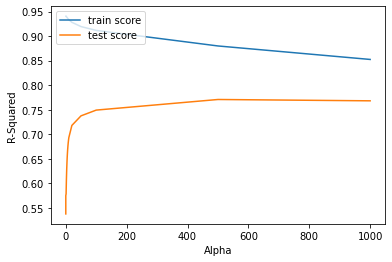

In [552]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting 
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('R-Squared')

plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [553]:
# List best params

ridge_reg.best_params_

{'alpha': 500}

In [554]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.12462179e+02, -2.61929503e+03,  7.81250946e+02,  2.92315871e+03,
        9.01198905e+03,  3.21240692e+03,  2.14961410e+03,  2.91007850e+03,
        4.55887349e+03,  4.46302940e+03,  5.52008385e+03,  4.79064964e+03,
       -5.32189560e+02,  7.98947226e+03,  3.11507145e+03,  2.27695440e+02,
        4.12947369e+03,  2.01257917e+03, -3.80393665e+02, -2.02846302e+03,
        4.37507654e+03,  2.85668664e+03, -2.75979903e+02,  4.90581132e+03,
        3.71528901e+03,  1.84153885e+03,  7.85103619e+02,  2.10125411e+02,
        9.07157264e+02,  1.24778668e+03,  1.97626073e+02,  2.70804317e+01,
       -4.20347471e+02, -4.11067162e+02,  9.43052641e+02,  2.85701946e+02,
        1.56119299e+03, -1.35968406e+03,  1.40078969e+03,  5.76669992e+02,
       -2.43543529e+03, -8.57218791e+02,  2.03825479e+03,  5.77804819e+02,
        1.20928411e+03, -9.26925509e+02,  1.97541821e+03, -9.14424661e+02,
       -6.80104620e+02, -5.28359349e+02,  2.99612714e+02, -1.59679991e+02,
       -1.00000854e+03,  

In [555]:
# predict
y_train_pred = ridge.predict(X_train)
print('R-squared on Training Dataset')
print(r2_score(y_true=y_train, y_pred=y_train_pred))

print('R-squared on Test dataset')
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_test, y_pred=y_test_pred))

R-squared on Training Dataset
0.8766829947927173
R-squared on Test dataset
0.8672090796648572


As a Result of Ridge Regression we got

##### R-squared for Train Data - 87.666

##### R-squared for Test Data - 86.858


This result says its a kind of good model

## Conclusion

### 1. The variables are significant in predicting the price of a house

- **GrLivArea**	- Above Ground Living Area Square Feet
- **OverallQual**- Overall material and finish of the house
- **Neighborhood** - Physical locations within Ames city limits - **Northridge Heights**
- **Neighborhood** - Physical locations within Ames city limits - **Northridge**
- **GarageCars** - Size of garage in car capacity
- **BsmtExposure_Gd**	- Refers to walkout or garden level walls with Good Exposure
- **RoofMatl** - Roof Material with **Wood Shingles**
- **YearBuilt** - Original construction date
- **BsmtFullBath** - Basement full bathrooms

### 2.The variables describe the price of a house
- These variable act as the predicting the price of the house. Availablity of these features really makes the price high and increase the customer's demand and also can be the reason of the quality and popularity
- Without these variables there might be drop in the sales and selling the houses at near loss which puts company under the pressure in some situations

